## Evaluating the error signal from PDH locking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


figure_path = os.path.join(os.getcwd(), "report", "figures")

# import data
data_path = os.path.join(os.getcwd(), "laser_gyroscope_data", "setup")

In [2]:
err_data = np.genfromtxt(os.path.join(data_path, "ERR01.csv"), delimiter=",", skip_header=1)

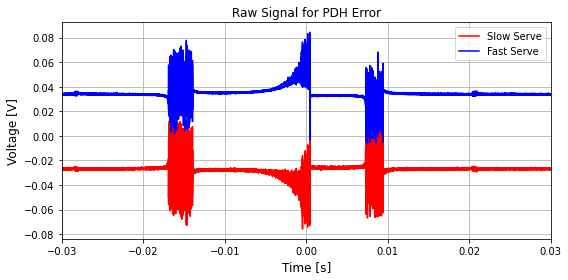

In [162]:
time = err_data[:,0]
sig1 = err_data[:,1]
sig2 = err_data[:,2]

fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)

ax.plot(time, sig1, label="Slow Serve", color="r")
ax.plot(time, sig2, label="Fast Serve", color="b")
ax.set_xlabel("Time [s]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Raw Signal for PDH Error", fontsize=12)
ax.set_xlim([-0.03, 0.03])
ax.legend()
ax.grid()

plt.savefig(os.path.join(figure_path, "raw_err_sig.png"), dpi=300)

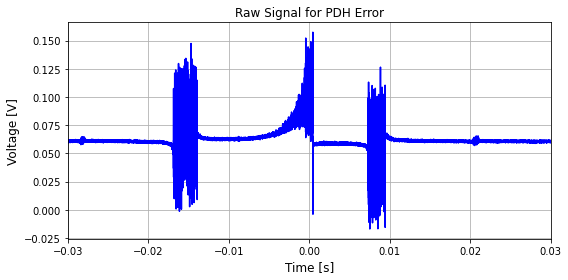

In [161]:
time = err_data[:,0]
sig1 = err_data[:,1]
sig2 = err_data[:,2]

fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)

# take difference between each signal to get combined signal
# this removes the offset between the signals
err_sig = sig2 - sig1

ax.plot(time, err_sig, color="b")
ax.set_xlabel("Time [s]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Raw Signal for PDH Error", fontsize=12)
ax.set_xlim([-0.03, 0.03])
# ax.legend()
ax.grid()

plt.savefig(os.path.join(figure_path, "raw_err_sig.png"), dpi=300)

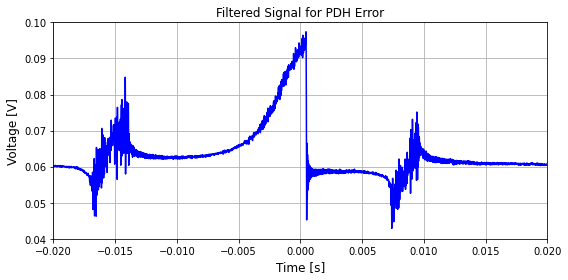

In [117]:
# filter the noise
from scipy.signal import sosfilt, ellip
sos = ellip(20, 0.009, 80, 0.05, output='sos')

err_sig_filt = sosfilt(sos, err_sig)

fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.plot(time, err_sig_filt, color="b")
ax.set_xlabel("Time [s]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Filtered Signal for PDH Error", fontsize=12)
ax.set_xlim([-0.02, 0.02])
ax.set_ylim([0.04, 0.10])
# ax.legend()
ax.grid()

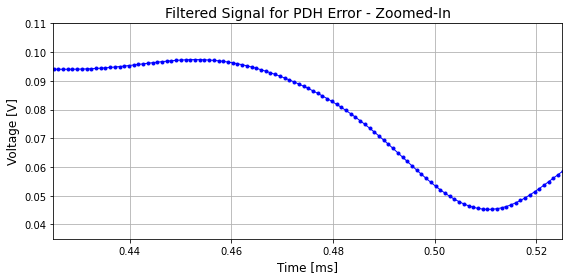

In [135]:
# zoom into the region of interest
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.plot(time *1e3, err_sig_filt, color="b", marker="o", ms=3.0, lw=1.0)
ax.set_xlabel("Time [ms]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Filtered Signal for PDH Error - Zoomed-In", fontsize=14)
ax.set_xlim([0.425, 0.525])
ax.set_ylim([0.035, 0.11])
# ax.legend()
ax.grid()

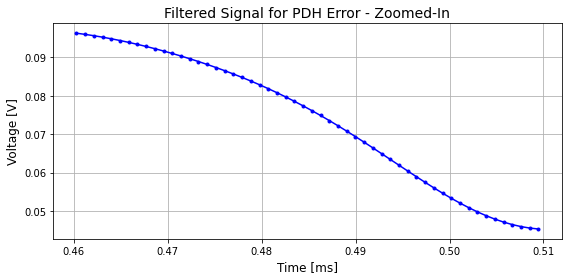

In [142]:
# now perform linear fit between the region of interest
# first truncate to region of interest

errsig_idces = np.argwhere((time *1e3 > 0.46) & (time *1e3 < 0.51))

# print(errsig_idces)

time_errsig = time[errsig_idces].reshape(len(errsig_idces))
# print(time_errsig1.shape)

errsig = err_sig_filt[errsig_idces].reshape(len(errsig_idces))
# print(errsig1.shape)
# plot results
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.plot(time_errsig * 1e3, errsig, marker="o", color="b", ms=3.0, ls="-")
ax.set_xlabel("Time [ms]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Filtered Signal for PDH Error - Zoomed-In", fontsize=14)
ax.grid()



slope: -1167.7001853527017 +- 579.7628567766898, int: 0.6398242325584388 +- 0.00013642852597701876


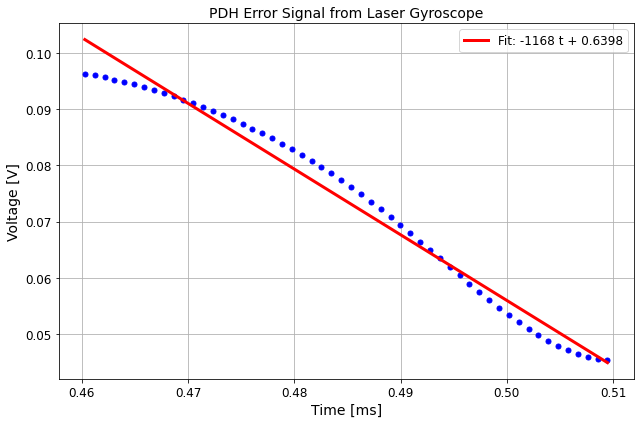

In [159]:
# perform linear fit for each of these points


fig, ax = plt.subplots(figsize=(9,6), tight_layout=True)
# print(time, err_sig)
(slope, intercept), cov = np.polyfit(time_errsig, errsig, 1, cov=True)

slope_err = cov[0,0]
intercept_err = cov[1,1]

print(f"slope: {slope} +- {slope_err}, int: {intercept} +- {intercept_err}")

ax.plot(time_errsig * 1e3, errsig, marker="o", ms=5.0, ls="", color="b")
ax.plot(time_errsig * 1e3, time_errsig * slope + intercept, lw=3.0, color="r", label=f"Fit: {slope:.0f} t + {intercept:.4f}")
ax.set_xlabel("Time [ms]", fontsize=14)
ax.set_ylabel("Voltage [V]", fontsize=14)
ax.set_title("PDH Error Signal from Laser Gyroscope", fontsize=14)
# ax.set_xlim(xmax=0.4525)
# ax.set_ylim(ymin=-0.1, ymax=0.10)
ax.legend(prop={"size":12}, ncol=2)
ax.grid()

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

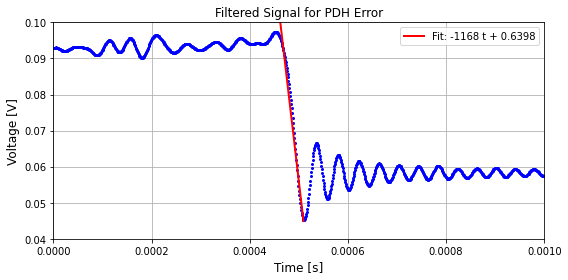

In [160]:


fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.plot(time, err_sig_filt, color="b", marker="o", ls="", ms=2.0)
ax.plot(time_errsig, time_errsig * slope + intercept, lw=2.0, color="r", label=f"Fit: {slope:.0f} t + {intercept:.4f}")
ax.set_xlabel("Time [s]", fontsize=12)
ax.set_ylabel("Voltage [V]", fontsize=12)
ax.set_title("Filtered Signal for PDH Error", fontsize=12)
ax.set_xlim([-0.000, 0.001])
ax.set_ylim([0.04, 0.10])
ax.legend()
ax.grid()